<a href="https://colab.research.google.com/github/JSJeong-me/2021-K-Digital-Training/blob/main/statistic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLB 선수연봉 데이터 불러오기

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Tue_Sep_15_19:12:04_Pacific_Daylight_Time_2020
Cuda compilation tools, release 11.1, V11.1.74
Build cuda_11.1.relgpu_drvr455TC455_06.29069683_0


In [ ]:
!nvcc --help

In [2]:
import pandas as pd
df=pd.read_csv('http://wolfpack.hnu.ac.kr/Big_Data/data/MLB1871_2018/Salaries.csv')

In [3]:
df.shape

(26428, 5)

결측치 제거

In [4]:
df.dropna(inplace=True)
df.shape

(26428, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    26428 non-null  int64 
 1   teamID    26428 non-null  object
 2   lgID      26428 non-null  object
 3   playerID  26428 non-null  object
 4   salary    26428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


*선수연봉* 2018년 subset

In [26]:
df16=df[(df['yearID']==2016) & (df['salary']>0)] #연봉 0 초과 선수만 활용
df16.head(3)

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300


In [14]:
df16.describe().round()

,yearID,salary
count,853.0,853.0
mean,2016.0,4396410.0
std,0.0,5900036.0
min,2016.0,507500.0
25%,2016.0,520000.0
50%,2016.0,1500000.0
75%,2016.0,6000000.0
max,2016.0,33000000.0


In [27]:
import plotly.express as px
fig = px.scatter(df16, x="salary", y="playerID", color="lgID",title="Player Salary with lgID")
fig.show()

ModuleNotFoundError: No module named 'plotly'

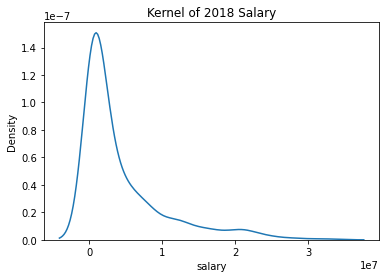

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df16.salary).set_title('Kernel of 2018 Salary')
plt.show()

C:\Users\j\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


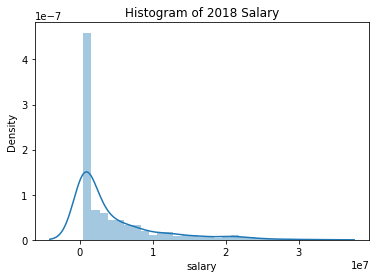

In [29]:
sns.distplot(df16.salary).set_title('Histogram of 2018 Salary')
plt.show()

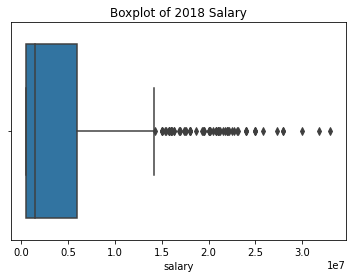

In [22]:
sns.boxplot(x="salary",data =df16).set_title('Boxplot of 2018 Salary')
plt.show()

## 실습


*   2018년 선수연봉과 2011년 선수연봉의 상자그림을 그리고 시각적으로 해석하시오.





##중심극한 정리 활용

sample data 만들기 n=50

In [17]:
df_sample=df16['salary'].sample(n=50, random_state=123) #seed=109

In [18]:
df_sample.shape

(50,)

C:\Users\j\anaconda3\envs\multi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


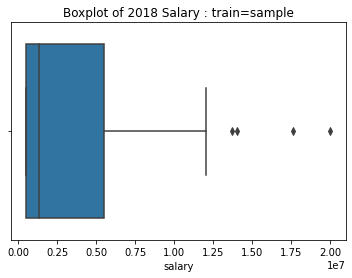

In [19]:
sns.boxplot(df_sample).set_title('Boxplot of 2018 Salary : train=sample')
plt.show()

In [21]:
df_sample.describe().round()

count          50.0
mean      3850525.0
std       4752988.0
min        507500.0
25%        520700.0
50%       1325000.0
75%       5500000.0
max      20000000.0
Name: salary, dtype: float64

#### 샘플갯수를 늘림

C:\Users\j\anaconda3\envs\multi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


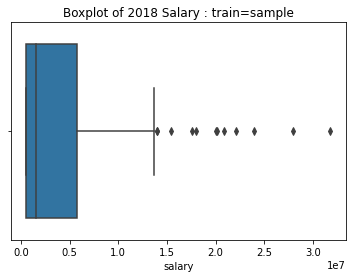

In [25]:
df_sample=df16['salary'].sample(n=150, random_state=123)
sns.boxplot(df_sample).set_title('Boxplot of 2018 Salary : train=sample')
plt.show()

크기 50인 확률표본  -> 평균, 100개 만들기

### 샘플링해서 분석하는 것 = 통계분석
### 모든 데이터를 가져와서 분석 = 빅데이터 분석

In [ ]:
xbar=[]
for k in range(0,100):
  xbar.append(df16['salary'].sample(n=50).mean())

In [ ]:
sns.boxplot(xbar).set_title('Boxplot of 2018 Salary : sample-mean')
plt.show()

##모집단 추론
2086년 MLB 선수들의 연봉이 40만불 이상인가?

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print('Population mean %.1f' % df16['salary'].mean()) #모잡단 연봉

추정

In [ ]:
print('Point estimaor %.1f' % df_sample.mean())

In [ ]:
import scipy.stats as st
import numpy as np
LB=df_sample.mean()-st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
UB=df_sample.mean()+st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
print('95%'+' confidence interval (%.1f , %.1f)' % (LB, UB))

가설검정


> H0 : mu=40 H1: mu!=40



In [ ]:
from scipy import stats
stats.ttest_1samp(df_sample,40)